In [1]:
# import libraries

# For analysis and numerical functions
import pandas as pd
import numpy as np

# Visualization, EDA
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

## Importing Data

Reading data stored in .csv format in 'Leads.csv'

In [2]:
# Read the data in pandas
lead_df = pd.read_csv('Leads.csv')

In [3]:
# Checking data
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Reading and Understanding the Dataframe

In [4]:
# Shape of dataframe
lead_df.shape

(9240, 37)

In [5]:
# dataframe description
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# dataframe information
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Sanity Checks 

In [7]:
# Finding duplicates
lead_df.duplicated().sum()

0

**Observation** - No duplicates found

In [8]:
# Converting SELECTs into NaNs:

lead_df = lead_df.replace('Select', np.nan)

In [9]:
# Checking for missing values:

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###### Observation:
 - As you we can see, there are a lot of column which have high number of missing values. 
 - Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [10]:
# Checking for % missing values
100*(lead_df.isnull().sum()/len(lead_df))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# dropping columns with null values % more than 50%:

lead_df = lead_df.drop(lead_df.loc[:, list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.45)].columns, 1)



In [12]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

### Imputing for null values 

In [13]:
# Handling Lead Source column:

lead_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [14]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')



In [15]:
# replacing 'google' with 'Google' to have a unique value:

lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')



In [16]:
# Handling Tags column:

lead_df['Tags'].value_counts(dropna=False)


NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [17]:
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')



In [18]:
lead_df['Last Activity'].value_counts(dropna=False)


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [19]:
# Replacing Nan with the most found value:

lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')



In [20]:
# Handling 'Specialization' column
lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# Replacing NaN in 'Specialization' with 'Select Specialization' - this means the customer did not fill this:

lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Select Specialization')



In [22]:
# Handling 'Current Occupation' column:

lead_df['What is your current occupation'].value_counts(dropna=False)



Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
# Replacing NaN with 'Unemployed':

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')



In [24]:
# Handling choice criteria column:

lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)



Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# Replacing NaN with 'Better Career Prospects' - most occuring:

lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


**Note:** All null values in categorical columns are replaced with the most occuring values

In [26]:
# Dropping 'City' and 'Country' column as they do not add in value for convertion:

lead_df.drop(['City', 'Country'], inplace=True, axis=1)



In [27]:
# Dropping columns as they are Skewed and do not add any value to modellation:

lead_df.drop(['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content',
'Receive More Updates About Our Courses', 'Magazine'], inplace=True, axis=1) 



In [28]:
# calculating mean of 'TotalVisits':

lead_df['TotalVisits'].mean()

3.445237833681204

In [29]:
# Replacing Nan with mean of 'TotalVisits':

lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.nan, 3.0)



In [30]:
# calculating mean of 'Page Views Per Visit':

lead_df['Page Views Per Visit'].mean()

2.3628199494672093

In [31]:
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.nan, 2.0)

In [32]:
# Converting from float to int type 
lead_df['TotalVisits']=lead_df['TotalVisits'].astype(int)
lead_df['Page Views Per Visit']=lead_df['Page Views Per Visit'].astype(int)

In [33]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Number                                    9240 non-null   int64 
 2   Lead Origin                                    9240 non-null   object
 3   Lead Source                                    9240 non-null   object
 4   Do Not Email                                   9240 non-null   object
 5   Do Not Call                                    9240 non-null   object
 6   Converted                                      9240 non-null   int64 
 7   TotalVisits                                    9240 non-null   int64 
 8   Total Time Spent on Website                    9240 non-null   int64 
 9   Page Views Per Visit                           9240 non-null   

## Visualising the Data - EDA

The most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the target variable (Converted)

In [34]:
# Segregating numerical and categorical columns:

numerical_cols = lead_df.select_dtypes(include=[np.number]).columns
categorical_cols = lead_df.select_dtypes(exclude=[np.number]).columns
print(numerical_cols)
print(categorical_cols)



Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')
Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [35]:
# Columns for analysis:

analysis_Catcols = categorical_cols.drop(['Prospect ID'])
analysis_Catcols


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Univariate Analysis

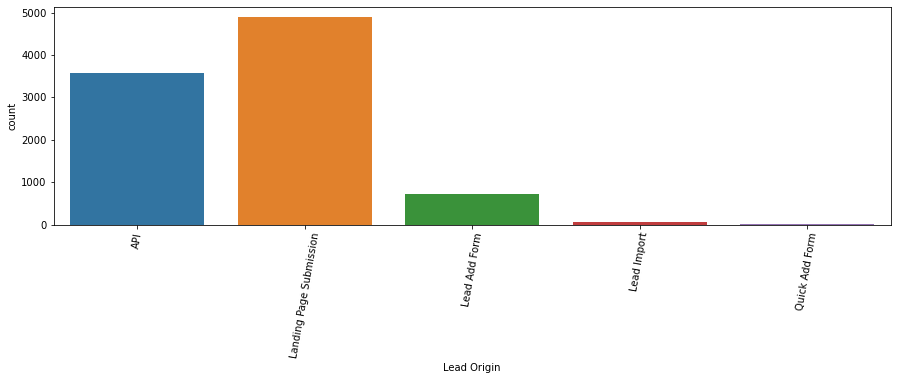

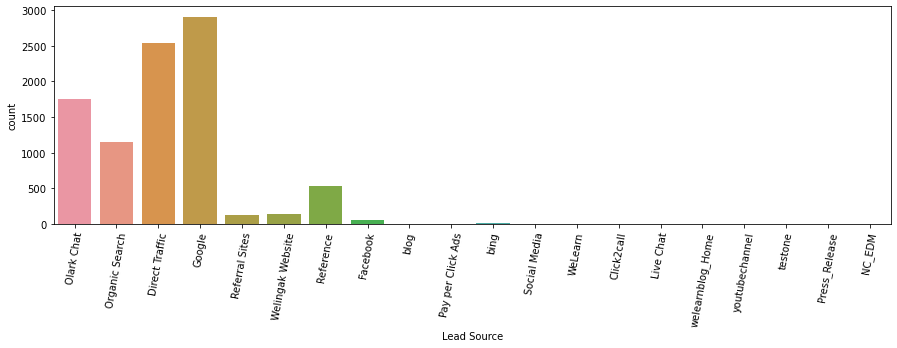

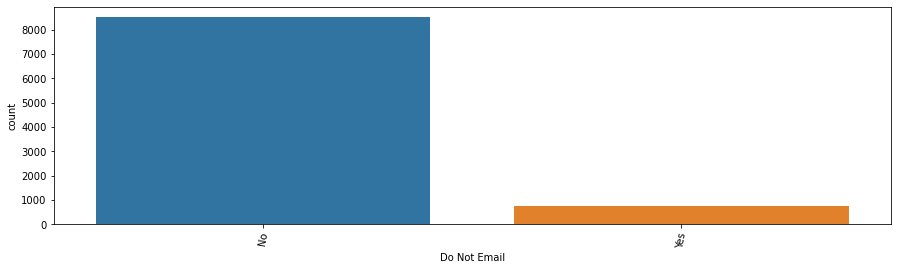

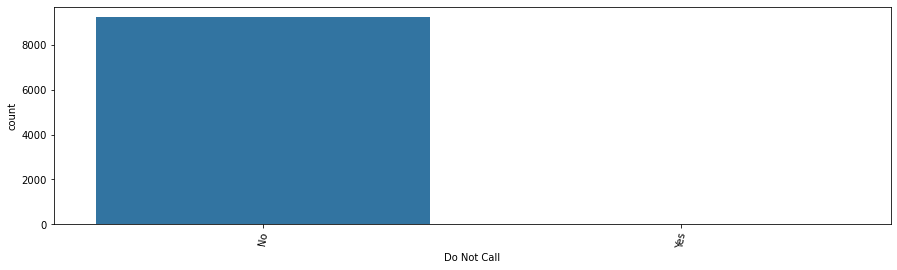

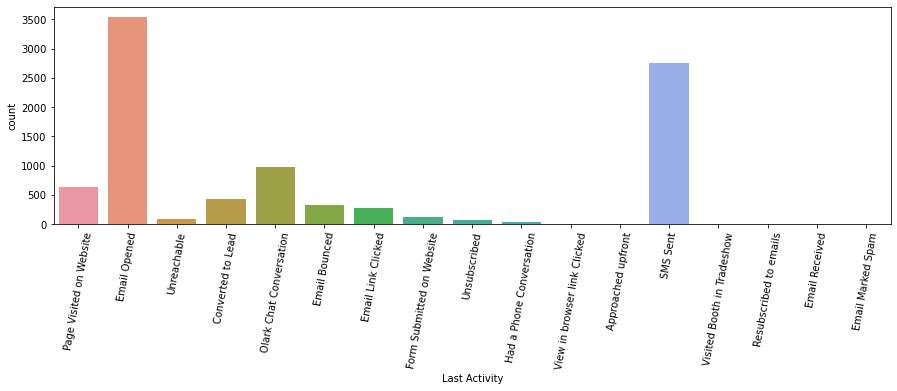

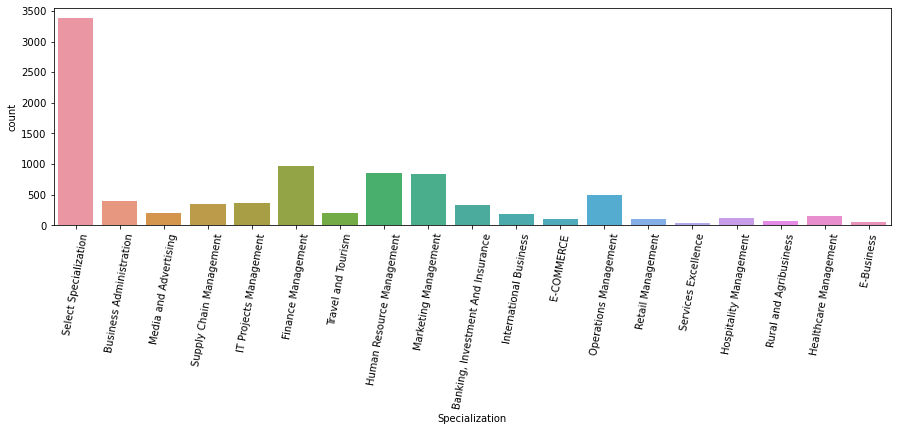

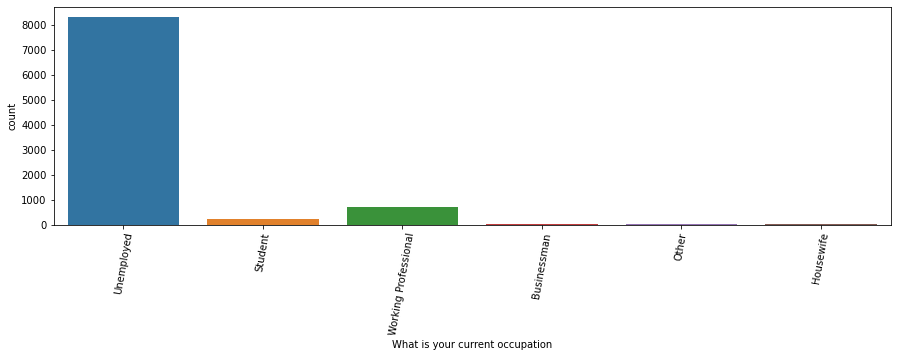

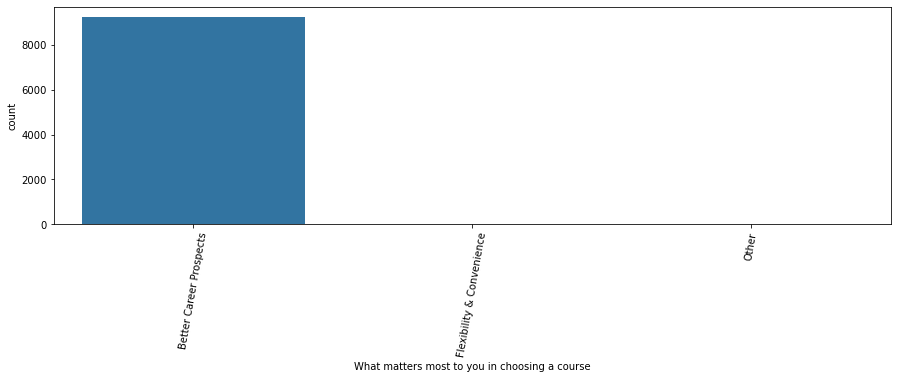

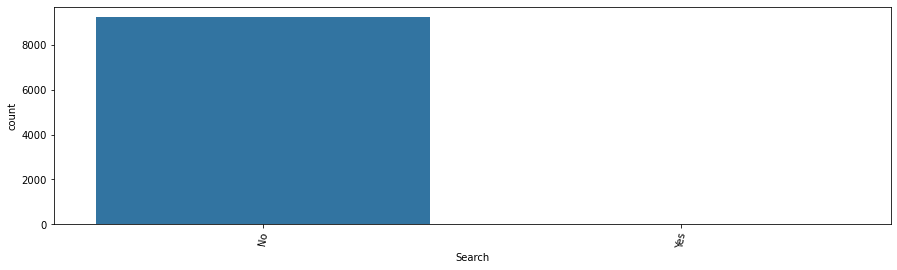

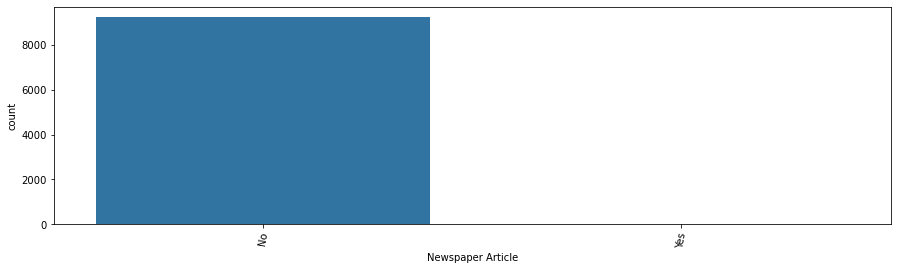

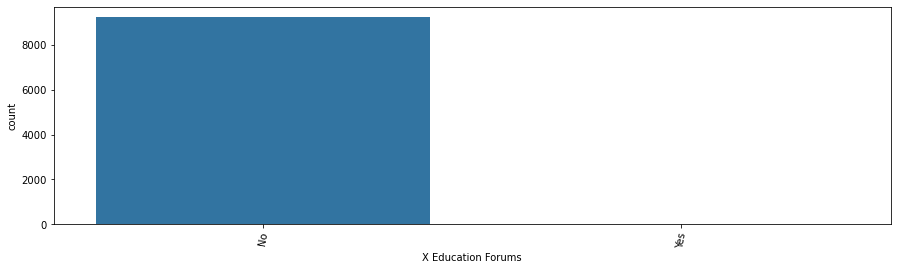

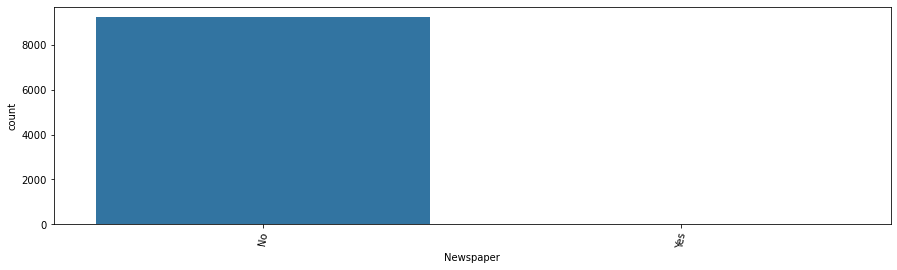

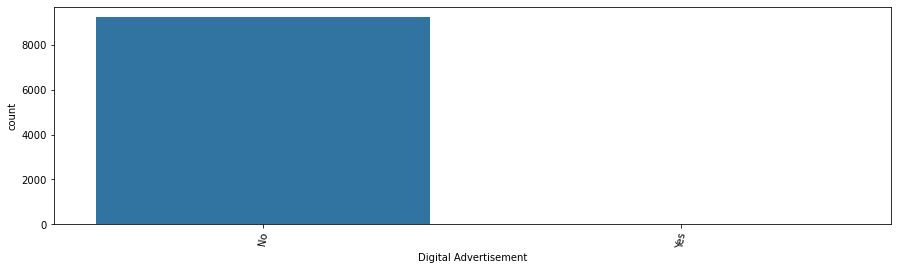

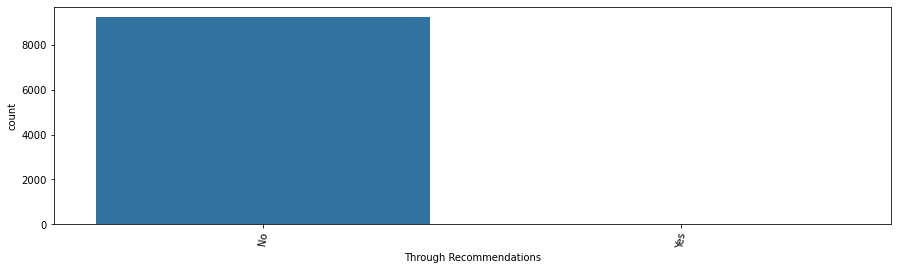

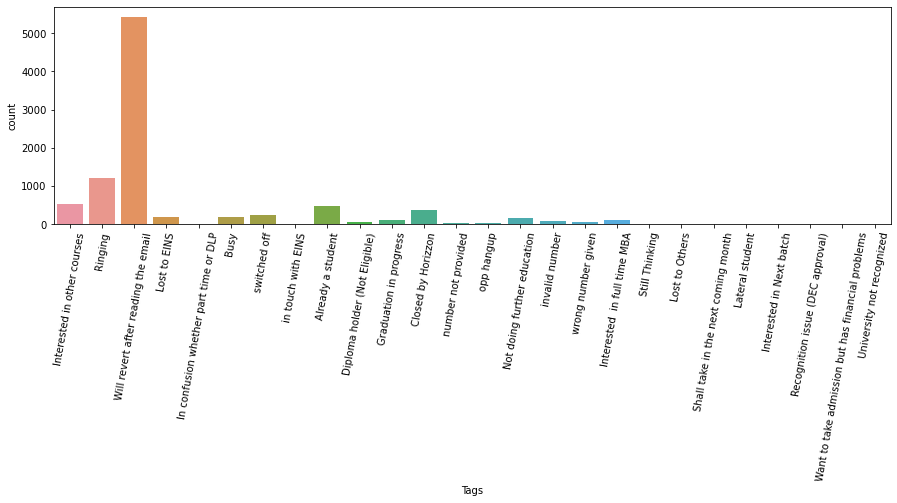

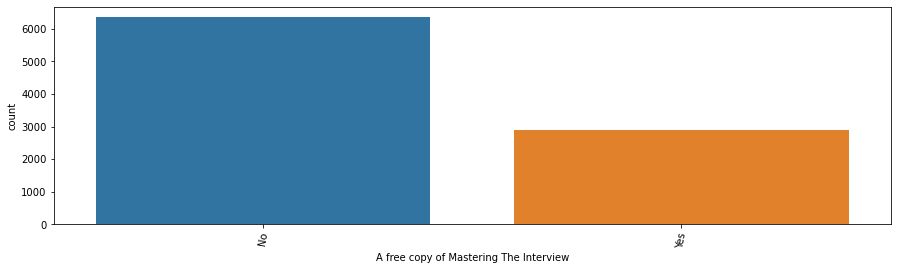

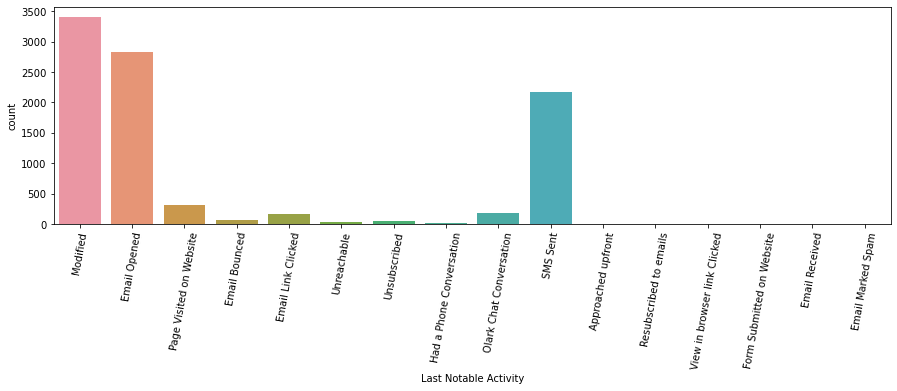

In [36]:
# Analysing categorical variables (count plot):

for i in analysis_Catcols:
    plt.figure(figsize=(15,4))
    sns.countplot(lead_df[i])
    plt.xticks(rotation = 80)
    plt.show()
    

Observation:
   - API and Landing Page Submission has less conversion rate but counts of the leads from them are considerable
   - The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
   - Lead Import has very less count as well as conversion rate and hence can be ignored

### Bivariate Analysis 

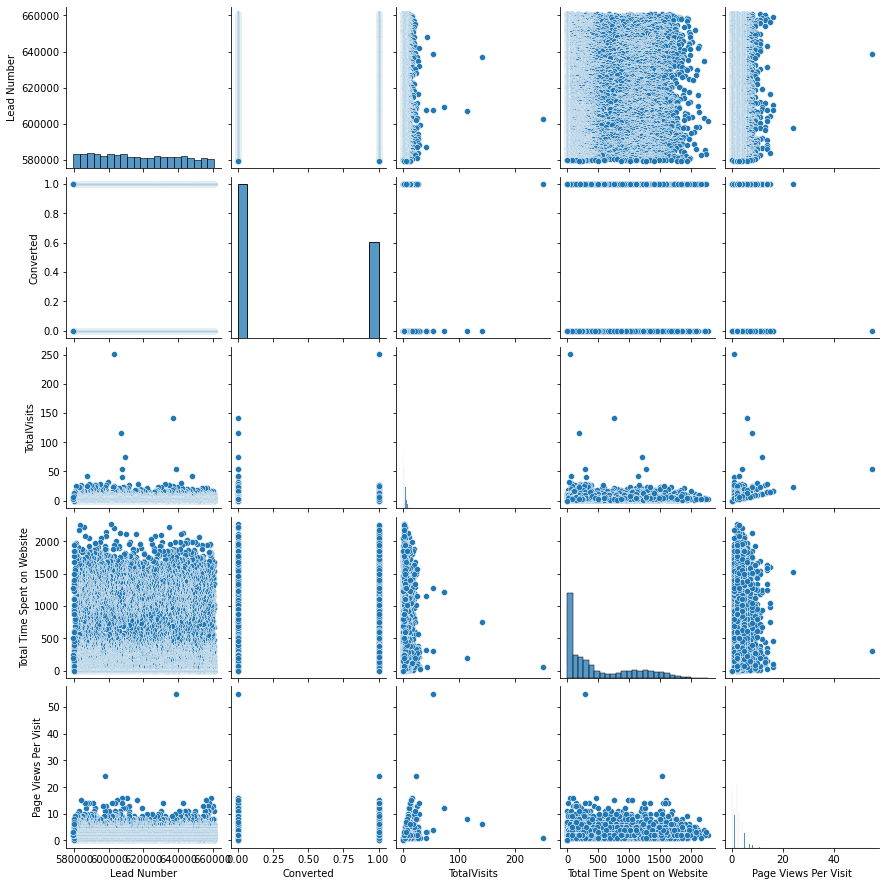

In [37]:
# Plotting bar graph:

sns.pairplot(lead_df[numerical_cols])
plt.show()

### Converting some binary variables (Yes/No) to 0/1

In [38]:
# List of variables to map:

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
'Through Recommendations', 'A free copy of Mastering The Interview'] 

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

#### Heat Map

<AxesSubplot:>

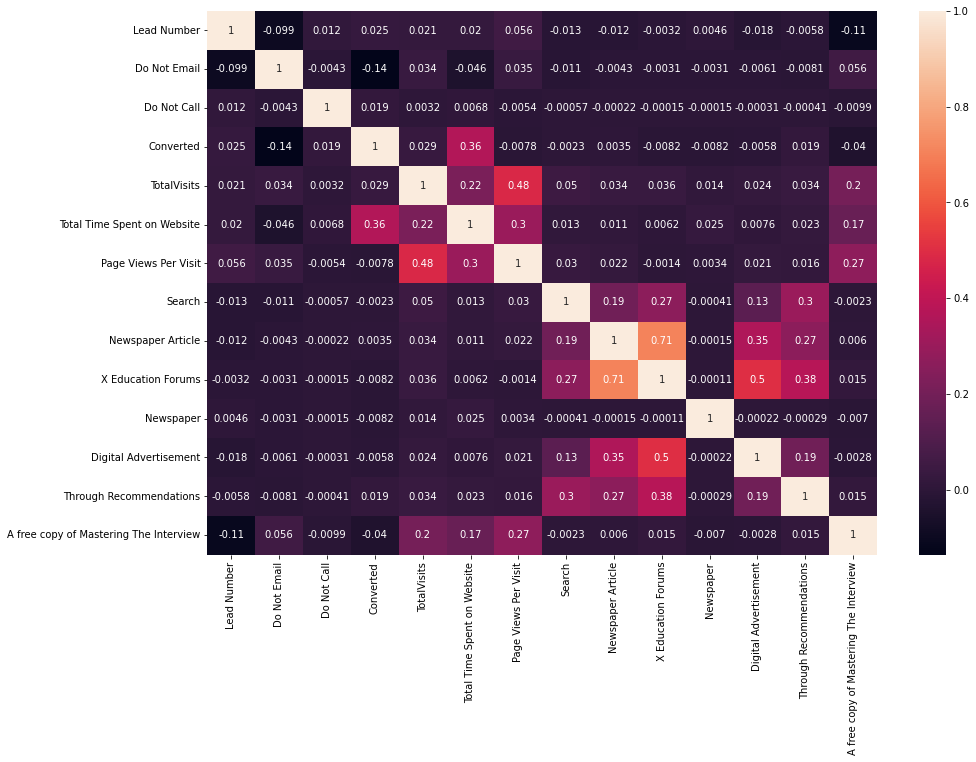

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(lead_df.corr(),annot=True)

### Reducing the number of values/levels for categorical columns

In [40]:
dummy_col_list = categorical_cols.drop(varlist)
dummy_col_list=dummy_col_list.drop(['Prospect ID'])
dummy_col_list

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'Last Notable Activity'],
      dtype='object')

##### Lead Score Column

In [41]:
100*(lead_df['Lead Source'].value_counts()/lead_df['Lead Source'].value_counts().sum())

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [42]:
# Replacing Nan with mean of 'TotalVisits'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Reference','Welingak Website','Referral Sites','Facebook',
                                                        'bing','Click2call', 'Social Media', 'Live Chat', 'Press_Release', 
                                                        'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel',
                                                        'testone', 'NC_EDM'], 3.0)

In [43]:
# Replacing Nan with mean of 'TotalVisits':

lead_df['Lead Source'] = lead_df['Lead Source'].replace([3.0,'Organic Search'], 'Others')

In [44]:
100*(lead_df['Lead Source'].value_counts()/lead_df['Lead Source'].value_counts().sum())

Google            31.482684
Direct Traffic    27.521645
Others            22.002165
Olark Chat        18.993506
Name: Lead Source, dtype: float64

##### Last Activity Column

In [45]:
100*(lead_df['Last Activity'].value_counts()/lead_df['Last Activity'].value_counts().sum())

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [46]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Converted to Lead', 'Email Bounced', 'Email Link Clicked', 
                                                         'Form Submitted on Website', 'Unreachable', 'Unsubscribed',
                                                         'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 
                                                         'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 
                                                         'Resubscribed to emails'], 'Others')

In [47]:
100*(lead_df['Last Activity'].value_counts()/lead_df['Last Activity'].value_counts().sum())

Email Opened               38.311688
SMS Sent                   29.707792
Others                     14.523810
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Name: Last Activity, dtype: float64

In [48]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace('Page Visited on Website','Others')

In [49]:
100*(lead_df['Last Activity'].value_counts()/lead_df['Last Activity'].value_counts().sum())

Email Opened               38.311688
SMS Sent                   29.707792
Others                     21.450216
Olark Chat Conversation    10.530303
Name: Last Activity, dtype: float64

##### Specialization Column

In [50]:
100*(lead_df['Specialization'].value_counts()/lead_df['Specialization'].value_counts().sum())

Select Specialization                36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [51]:
lead_df['Specialization'] = lead_df['Specialization'].replace(['Operations Management', 'Business Administration', 'IT Projects Management', 
                                                         'Supply Chain Management', 'Banking, Investment And Insurance', 'Travel and Tourism',
                                                         'Media and Advertising', 'International Business', 'Healthcare Management', 
                                                         'Hospitality Management', 'E-COMMERCE', 'Retail Management', 
                                                         'Rural and Agribusiness', 'E-Business', 'Services Excellence'], 'Others')

In [52]:
100*(lead_df['Specialization'].value_counts()/lead_df['Specialization'].value_counts().sum())

Select Specialization        36.580087
Others                       34.610390
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Name: Specialization, dtype: float64

In [53]:
lead_df['Specialization'] = lead_df['Specialization'].replace(['Human Resource Management','Marketing Management'], 'Human Resource and Marketing Management')

In [54]:
100*(lead_df['Specialization'].value_counts()/lead_df['Specialization'].value_counts().sum())

Select Specialization                      36.580087
Others                                     34.610390
Human Resource and Marketing Management    18.246753
Finance Management                         10.562771
Name: Specialization, dtype: float64

##### Current Occupation Column

In [55]:
100*(lead_df['What is your current occupation'].value_counts()/lead_df['What is your current occupation'].value_counts().sum())

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [56]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Housewife', 'Businessman'], 'Others')

In [57]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace('Other','Others')

In [58]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace('Student','Others')

In [59]:
100*(lead_df['What is your current occupation'].value_counts()/lead_df['What is your current occupation'].value_counts().sum())

Unemployed              89.718615
Working Professional     7.640693
Others                   2.640693
Name: What is your current occupation, dtype: float64

##### Tags Column

In [60]:
100*(lead_df['Tags'].value_counts()/lead_df['Tags'].value_counts().sum())

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [61]:
lead_df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [62]:
lead_df['Tags'] = lead_df['Tags'].replace(['Lost to EINS','In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS','Diploma holder (Not Eligible)', 'Graduation in progress','number not provided', 'opp hangup',
       'Not doing further education', 'invalid number','wrong number given', 'Interested  in full time MBA', 'Still Thinking',
       'Lost to Others','Shall take in the next coming month', 'Lateral student','Interested in Next batch', 
       'Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Others')

In [63]:
lead_df['Tags'] = lead_df['Tags'].replace('Closed by Horizzon', 'Others')

In [64]:
100*(lead_df['Tags'].value_counts()/lead_df['Tags'].value_counts().sum())

Will revert after reading the email    58.712121
Others                                 17.683983
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64

##### Last Notable Activity Column

In [65]:
100*(lead_df['Last Notable Activity'].value_counts()/lead_df['Last Notable Activity'].value_counts().sum())

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [66]:
lead_df['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [67]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace([ 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 'Others')

In [68]:
100*(lead_df['Last Notable Activity'].value_counts()/lead_df['Last Notable Activity'].value_counts().sum())

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Last Notable Activity, dtype: float64

## Data Preparation 

### Dummy variable creation

In [69]:
dummy_col_list

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [70]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'leadOrigin_cols'
leadOrigin_cols = pd.get_dummies(lead_df['Lead Origin'], drop_first = True, prefix='Lead Origin', prefix_sep='_')
leadOrigin_cols.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [71]:
# Get the dummy variables for the feature 'Lead Source' and store it in a new variable - 'leadSource_cols'
leadSource_cols = pd.get_dummies(lead_df['Lead Source'], prefix='Lead Source', prefix_sep='_')
leadSource_cols.head()

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [72]:
leadSource_cols.drop('Lead Source_Others', inplace= True, axis =1)
leadSource_cols.head()

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat
0,0,0,1
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [73]:
# Get the dummy variables for the feature 'Last Activity' and store it in a new variable - 'lastActivity_cols'
lastActivity_cols = pd.get_dummies(lead_df['Last Activity'], prefix='Last Activity', prefix_sep='_')
lastActivity_cols.head()

,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [74]:
lastActivity_cols.drop('Last Activity_Others', inplace= True, axis =1)
lastActivity_cols.head()

,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
0,0,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [75]:
# Get the dummy variables for the feature 'Specialization' and store it in a new variable - 'specialization_cols'
specialization_cols = pd.get_dummies(lead_df['Specialization'], prefix='Specialization', prefix_sep='_')
specialization_cols.head()

,Specialization_Finance Management,Specialization_Human Resource and Marketing Management,Specialization_Others,Specialization_Select Specialization
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [76]:
specialization_cols.drop('Specialization_Select Specialization', inplace= True, axis =1)
specialization_cols.head()

,Specialization_Finance Management,Specialization_Human Resource and Marketing Management,Specialization_Others
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [77]:
# Get the dummy variables for the feature 'What is your current occupation' and store it in a new variable - 'currentOccupation_cols'
currentOccupation_cols = pd.get_dummies(lead_df['What is your current occupation'], prefix='Current Occupation', prefix_sep='_')
currentOccupation_cols.head()

,Current Occupation_Others,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [78]:
currentOccupation_cols.drop('Current Occupation_Others', inplace=True, axis=1)
currentOccupation_cols.head()

,Current Occupation_Unemployed,Current Occupation_Working Professional
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


In [79]:
# Get the dummy variables for the feature 'What is your current occupation' and store it in a new variable - 'choiceCriteria_cols'
choiceCriteria_cols = pd.get_dummies(lead_df['What matters most to you in choosing a course'], prefix='Choice Criteria', prefix_sep='_')
choiceCriteria_cols.head()

,Choice Criteria_Better Career Prospects,Choice Criteria_Flexibility & Convenience,Choice Criteria_Other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [80]:
choiceCriteria_cols.drop('Choice Criteria_Other', inplace=True, axis=1)
choiceCriteria_cols.head()

,Choice Criteria_Better Career Prospects,Choice Criteria_Flexibility & Convenience
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [81]:
# Get the dummy variables for the feature 'Tags' and store it in a new variable - 'tags_cols'
tags_cols = pd.get_dummies(lead_df['Tags'], prefix='Tags', prefix_sep='_')
tags_cols.head()

,Tags_Already a student,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1


In [82]:
tags_cols.drop('Tags_Others', inplace=True, axis=1)
tags_cols.head()

,Tags_Already a student,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [83]:
# Get the dummy variables for the feature 'Last Notable Activity' and store it in a new variable - 'lastNotableActivity_cols'
lastNotableActivity_cols = pd.get_dummies(lead_df['Last Notable Activity'], prefix='Last Notable Activity', prefix_sep='_')
lastNotableActivity_cols.head()

,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [84]:
lastNotableActivity_cols.drop('Last Notable Activity_Others', inplace=True, axis=1)
lastNotableActivity_cols.head()

,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [85]:
# Add columns to the original dataframe
lead_df = pd.concat([lead_df, leadOrigin_cols, leadSource_cols, lastActivity_cols, specialization_cols, 
                    currentOccupation_cols, choiceCriteria_cols, tags_cols, lastNotableActivity_cols], axis = 1)

In [86]:
# Remove season, weathersit, month and weekday columns
lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
       'What matters most to you in choosing a course', 'Tags','Last Notable Activity'], inplace = True, axis=1)

In [87]:
# Check dataframe
lead_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,Current Occupation_Working Professional,Choice Criteria_Better Career Prospects,Choice Criteria_Flexibility & Convenience,Tags_Already a student,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5,674,2,0,0,...,0,1,0,0,0,1,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2,1532,2,0,0,...,0,1,0,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1,305,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2,1428,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [88]:
# dataframe information
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Prospect ID                                             9240 non-null   object
 1   Lead Number                                             9240 non-null   int64 
 2   Do Not Email                                            9240 non-null   int64 
 3   Do Not Call                                             9240 non-null   int64 
 4   Converted                                               9240 non-null   int64 
 5   TotalVisits                                             9240 non-null   int64 
 6   Total Time Spent on Website                             9240 non-null   int64 
 7   Page Views Per Visit                                    9240 non-null   int64 
 8   Search                                          

### Looking at Correlations

<AxesSubplot:>

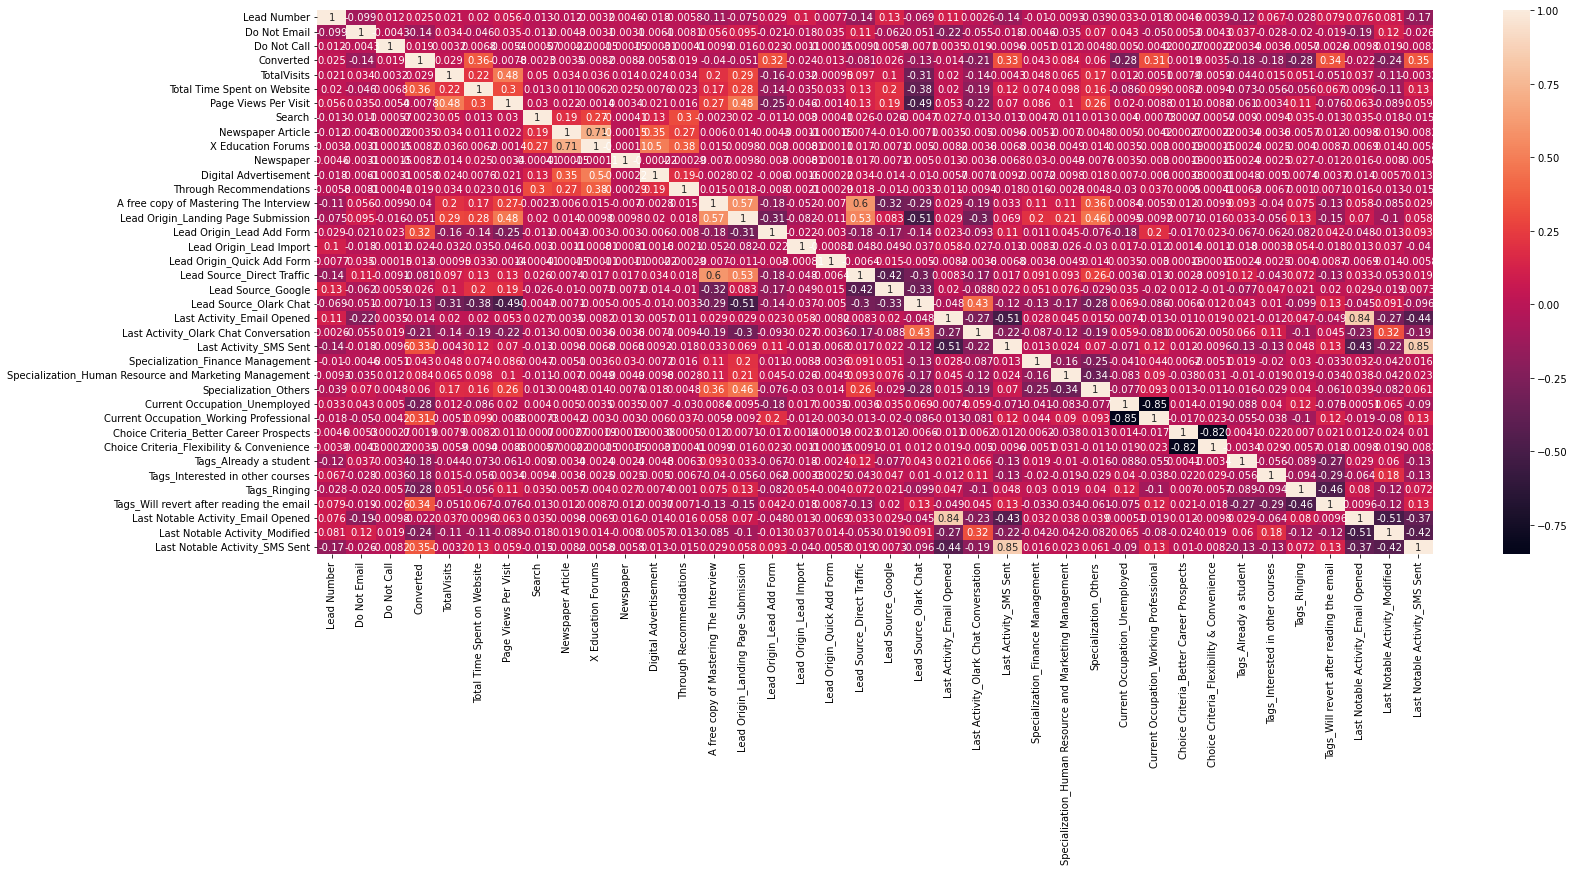

In [89]:
plt.figure(figsize=(25,10))
sns.heatmap(lead_df.corr(),annot=True)

In [90]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Human Resource and Marketing Management',
       'Specialization_Others', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Choice Criteria_Better Career Prospects',
       'Choice Criteria_Flexibility & Convenience', 

In [91]:
lead_data = lead_df.drop(['Current Occupation_Working Professional', 'Choice Criteria_Better Career Prospects','Last Activity_Email Opened',
             'Last Activity_SMS Sent', 'X Education Forums', 'Lead Source_Direct Traffic'], axis=1)



<AxesSubplot:>

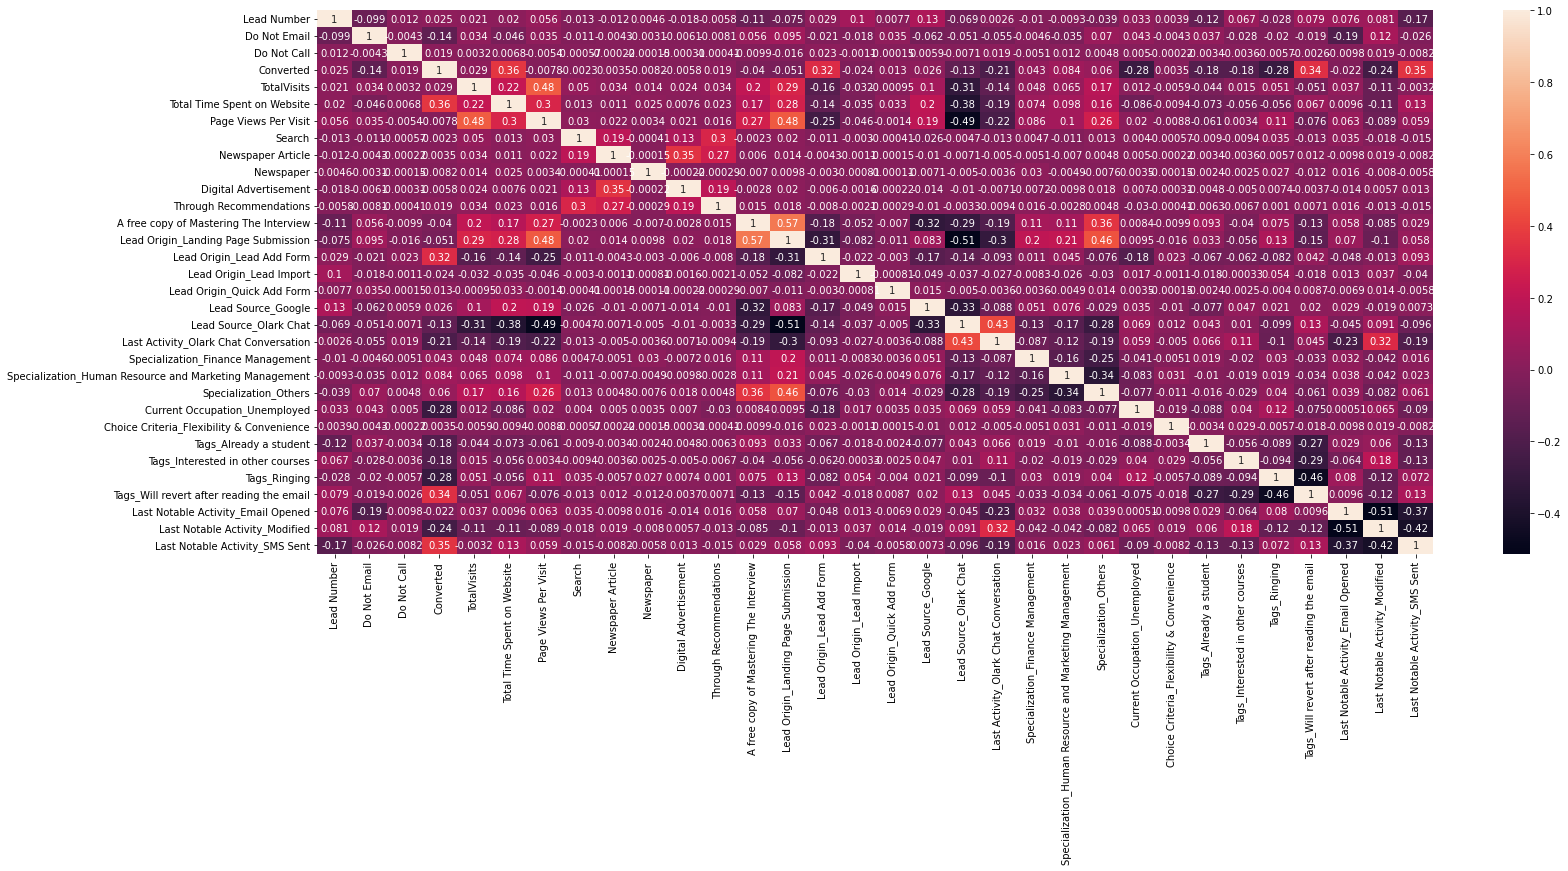

In [92]:
plt.figure(figsize=(25,10))
sns.heatmap(lead_data.corr(),annot=True)

In [93]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Prospect ID                                             9240 non-null   object
 1   Lead Number                                             9240 non-null   int64 
 2   Do Not Email                                            9240 non-null   int64 
 3   Do Not Call                                             9240 non-null   int64 
 4   Converted                                               9240 non-null   int64 
 5   TotalVisits                                             9240 non-null   int64 
 6   Total Time Spent on Website                             9240 non-null   int64 
 7   Page Views Per Visit                                    9240 non-null   int64 
 8   Search                                          

In [94]:
### Checking the Converted Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.53896103896104

**Note** - We have almost 39% Converted rate. This is acceptable. Therefore, not very high class imbalance

### Train-Test Split

In [95]:
# importing library for train-test split
from sklearn.model_selection import train_test_split

In [96]:
# Drop 'ProspectID' and 'Converted' and storing in X -> features
X = lead_data.drop(['Prospect ID','Converted', 'Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,...,Specialization_Others,Current Occupation_Unemployed,Choice Criteria_Flexibility & Convenience,Tags_Already a student,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,5,674,2,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,2,1532,2,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,1,305,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0,0,2,1428,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [97]:
# Putting response variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,...,Specialization_Others,Current Occupation_Unemployed,Choice Criteria_Flexibility & Convenience,Tags_Already a student,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1871,0,0,-0.656434,-0.885371,-1.051699,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6795,0,0,0.100767,0.005716,-0.590301,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3516,0,0,0.290067,-0.691418,-0.128903,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8105,0,0,0.290067,1.365219,1.255291,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
3934,0,0,-0.656434,-0.885371,-1.051699,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


### Model Building
Let's start by splitting our data into a training set and a test set.

#### Running First Training Model

In [101]:
import statsmodels.api as sm

In [102]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.4
Date:                Tue, 13 Sep 2022   Deviance:                       4168.7
Time:                        05:51:07   Pearson chi2:                 1.12e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.4077      0.259      1.572      0.116      -0.101       0.916
Do Not Email                                              -1.5392      0.184     -8.367      0.000      -1.900      -1.179
Do Not Call                                               21.1030   3.26e+04      0.001      0.999   -6.39e+04     6.4e+04
TotalVisits                                                0.1595      0.042      3.831      0.000       0.078       0.241
Total Time Spent on Website                                1.1147      0.047     23.840      0.000       1.023       1.206
Page Views Per Visit                                      -0.1276      0.055     -2.330      0.020      -0.235      -0.020
Search                                                     1.3969      1.094      1.276      0.202      -0.748       3.542
Newspaper Article                                         22.0855   1.82e+04      0.001      0.999   -3.56e+04    3.56e+04
Newspaper                                                -20.6361   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                    -46.3241   2.57e+04     -0.002      0.999   -5.04e+04    5.03e+04
Through Recommendations                                    2.2531      2.237      1.007      0.314      -2.132       6.638
A free copy of Mastering The Interview                    -0.1863      0.120     -1.554      0.120      -0.421       0.049
Lead Origin_Landing Page Submission                       -0.9948      0.151     -6.570      0.000      -1.292      -0.698
Lead Origin_Lead Add Form                                  3.8416      0.246     15.609      0.000       3.359       4.324
Lead Origin_Lead Import                                    0.0131      0.601      0.022      0.983      -1.164       1.191
Lead Origin_Quick Add Form                                20.5468   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                         0.0550      0.110      0.500      0.617      -0.160       0.270
Lead Source_Olark Chat                                     0.8145      0.163      4.988      0.000       0.494       1.135
Last Activity_Olark Chat Conversation                     -1.1810      0.186     -6.334      0.000      -1.546      -0.816
Specialization_Finance Management                          1.5097      0.183      8.243      0.000       1.151       1.869
Specialization_Human Resource and Marketing Management     1.2289      0.162      7.585      0.000       0.911       1.546
Specialization_Others                                      1.2768      0.153      8.351      0.000       0.977       1.576
Current 

#### Feature Selection Using RFE

In [103]:
X_train.shape

(6468, 30)

In [104]:
# logistic regression library and object 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [105]:
from sklearn.feature_selection import RFE

##### Selecting 16 features

In [106]:
rfe = RFE(logreg, 16)             # running RFE with 16 variables as output
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True])

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Search', False, 2),
 ('Newspaper Article', False, 5),
 ('Newspaper', False, 10),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 6),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource and Marketing Management', True, 1),
 ('Specialization_Others', True, 1),
 ('Current Occupation_Unemployed', True, 1),
 ('Choice Criteria_Flexibility & Convenience', False, 13),
 ('Tags_Already a student', True, 1),
 ('Tags_Intereste

In [109]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Specialization_Finance Management',
       'Specialization_Human Resource and Marketing Management',
       'Specialization_Others', 'Current Occupation_Unemployed',
       'Tags_Already a student', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2117.7
Date:                Tue, 13 Sep 2022   Deviance:                       4235.5
Time:                        05:51:08   Pearson chi2:                 1.20e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.3675      0.216      1.702      0.089      -0.056       0.791
Do Not Email                                              -1.6577      0.176     -9.415      0.000      -2.003      -1.313
Total Time Spent on Website                                1.1048      0.046     23.996      0.000       1.015       1.195
Digital Advertisement                                    -20.6333   1.47e+04     -0.001      0.999   -2.88e+04    2.87e+04
Lead Origin_Landing Page Submission                       -1.0733      0.145     -7.411      0.000      -1.357      -0.789
Lead Origin_Lead Add Form                                  3.7793      0.230     16.463      0.000       3.329       4.229
Lead Source_Olark Chat                                     0.8325      0.133      6.242      0.000       0.571       1.094
Last Activity_Olark Chat Conversation                     -1.4399      0.176     -8.164      0.000      -1.786      -1.094
Specialization_Finance Management                          1.4932      0.177      8.417      0.000       1.146       1.841
Specialization_Human Resource and Marketing Management     1.2017      0.156      7.711      0.000       0.896       1.507
Specialization_Others                                      1.2349      0.146      8.470      0.000       0.949       1.521
Current Occupation_Unemployed                             -2.0828      0.179    -11.626      0.000      -2.434      -1.732
Tags_Already a student                                    -4.4293      0.733     -6.040      0.000      -5.867      -2.992
Tags_Interested in other courses                          -2.9717      0.374     -7.951      0.000      -3.704      -2.239
Tags_Ringing                                              -3.7671      0.245    -15.379      0.000      -4.247      -3.287
Tags_Will revert after reading the email                   0.7848      0.096      8.169      0.000       0.597       0.973
Last Notable Activity_SMS Sent                             1.9556      0.099     19.835      0.000       1.762       2.149
==========================================================================================================================
"""

##### Dropping 'Digital Advertisement' column

In [111]:
col = col.drop('Digital Advertisement')

In [112]:
# re-run after deleting 'Digital Advertisement' feature
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2118.9
Date:                Tue, 13 Sep 2022   Deviance:                       4237.8
Time:                        05:51:08   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.3684      0.216      1.706      0.088      -0.055       0.792
Do Not Email                                              -1.6558      0.176     -9.403      0.000      -2.001      -1.311
Total Time Spent on Website                                1.1054      0.046     24.012      0.000       1.015       1.196
Lead Origin_Landing Page Submission                       -1.0753      0.145     -7.425      0.000      -1.359      -0.791
Lead Origin_Lead Add Form                                  3.7798      0.230     16.467      0.000       3.330       4.230
Lead Source_Olark Chat                                     0.8331      0.133      6.247      0.000       0.572       1.094
Last Activity_Olark Chat Conversation                     -1.4401      0.176     -8.165      0.000      -1.786      -1.094
Specialization_Finance Management                          1.4949      0.177      8.426      0.000       1.147       1.843
Specialization_Human Resource and Marketing Management     1.2034      0.156      7.721      0.000       0.898       1.509
Specialization_Others                                      1.2328      0.146      8.457      0.000       0.947       1.519
Current Occupation_Unemployed                             -2.0846      0.179    -11.637      0.000      -2.436      -1.733
Tags_Already a student                                    -4.4286      0.733     -6.039      0.000      -5.866      -2.991
Tags_Interested in other courses                          -2.9706      0.374     -7.948      0.000      -3.703      -2.238
Tags_Ringing                                              -3.7644      0.245    -15.371      0.000      -4.244      -3.284
Tags_Will revert after reading the email                   0.7859      0.096      8.184      0.000       0.598       0.974
Last Notable Activity_SMS Sent                             1.9540      0.099     19.836      0.000       1.761       2.147
==========================================================================================================================
"""

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.20
9,Current Occupation_Unemployed,5.28
8,Specialization_Others,4.25
13,Tags_Will revert after reading the email,3.46
7,Specialization_Human Resource and Marketing Ma...,2.60
4,Lead Source_Olark Chat,2.18
6,Specialization_Finance Management,2.00
12,Tags_Ringing,1.66
3,Lead Origin_Lead Add Form,1.50
5,Last Activity_Olark Chat Conversation,1.45


VIF value is more than 5 for 'Lead Origin_Landing Page Submission' and 'Current Occupation_Unemployed'. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. Therefore, dropping 'Lead Origin_Landing Page Submission' first 

In [115]:
col = col.drop('Lead Origin_Landing Page Submission')

In [116]:
# re-run after deleting 'Digital Advertisement' feature
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2147.5
Date:                Tue, 13 Sep 2022   Deviance:                       4295.1
Time:                        05:51:08   Pearson chi2:                 1.03e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1401      0.211      0.664      0.506      -0.273       0.553
Do Not Email                                              -1.7342      0.174     -9.976      0.000      -2.075      -1.393
Total Time Spent on Website                                1.1230      0.046     24.436      0.000       1.033       1.213
Lead Origin_Lead Add Form                                  4.2917      0.217     19.762      0.000       3.866       4.717
Lead Source_Olark Chat                                     1.1812      0.126      9.405      0.000       0.935       1.427
Last Activity_Olark Chat Conversation                     -1.4007      0.172     -8.123      0.000      -1.739      -1.063
Specialization_Finance Management                          0.7693      0.145      5.293      0.000       0.484       1.054
Specialization_Human Resource and Marketing Management     0.5161      0.122      4.230      0.000       0.277       0.755
Specialization_Others                                      0.5186      0.107      4.862      0.000       0.310       0.728
Current Occupation_Unemployed                             -2.1084      0.175    -12.068      0.000      -2.451      -1.766
Tags_Already a student                                    -4.4306      0.730     -6.068      0.000      -5.862      -2.999
Tags_Interested in other courses                          -2.7695      0.369     -7.499      0.000      -3.493      -2.046
Tags_Ringing                                              -3.8098      0.246    -15.512      0.000      -4.291      -3.328
Tags_Will revert after reading the email                   0.8154      0.096      8.509      0.000       0.628       1.003
Last Notable Activity_SMS Sent                             1.9238      0.098     19.618      0.000       1.732       2.116
==========================================================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Current Occupation_Unemployed,4.86
12,Tags_Will revert after reading the email,3.46
7,Specialization_Others,1.99
3,Lead Source_Olark Chat,1.95
11,Tags_Ringing,1.66
6,Specialization_Human Resource and Marketing Ma...,1.51
4,Last Activity_Olark Chat Conversation,1.45
13,Last Notable Activity_SMS Sent,1.44
5,Specialization_Finance Management,1.30
1,Total Time Spent on Website,1.28


In [118]:
# Predicted output - for train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.00621156, 0.24113347, 0.00461679, ..., 0.27568138, 0.12400814,
       0.27568138])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.006212,1871
1,0,0.241133,6795
2,0,0.004617,3516
3,0,0.141530,8105
4,0,0.275681,3934


##### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [120]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [121]:
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,0,0.006212,1871,0
1,0,0.241133,6795,0
2,0,0.004617,3516,0
3,0,0.141530,8105,0
4,0,0.275681,3934,0


In [122]:
from sklearn import metrics

In [123]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3638  364]
 [ 507 1959]]


In [124]:
# Predicted         not_converted     converted
# Actual    
# not_converted       3638             364
# converted           507              1959

In [125]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8653370439084724


**Accuracy:** Accuracy is approx. =  87% 

In [126]:
# Matrix terms

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Plotting the ROC Curve

- It shows tradeoff between sensitivity and specificity
- Closer the curve is to the left-top, more accurate is the result
- More linear/45 degree the the curve is, more accurate is the result

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

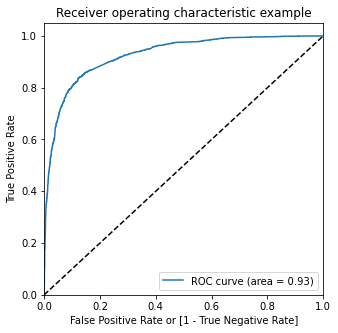

In [129]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is the prob where we get balanced sensitivity and specificity (intersection of sensitivity and specificity) and also optimal value of accuracy

In [130]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006212,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.241133,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.004617,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.141530,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.275681,3934,0,1,1,1,0,0,0,0,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

In [132]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     0.000000     1.000000
0.1   0.1  0.707019     0.544228     0.971208
0.2   0.2  0.784787     0.694903     0.930657
0.3   0.3  0.851422     0.844328     0.862936
0.4   0.4  0.860235     0.881809     0.825223
0.5   0.5  0.865337     0.909045     0.794404
0.6   0.6  0.859771     0.932534     0.741687
0.7   0.7  0.844156     0.955772     0.663017
0.8   0.8  0.807514     0.977011     0.532441
0.9   0.9  0.764069     0.988006     0.400649


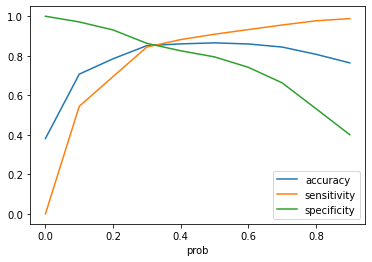

In [133]:
# Line plot for accuracy, sensitivity and specificity from cuttoff_df
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

**Note** - It can be noticed from the above graph that accuracy, sensitivity and specificity very close at prob of 0.3. Therefore, cutoff of 0.3 will be considered

In [134]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006212,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.241133,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.004617,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.141530,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.275681,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [135]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion_matrix)

[[3379  623]
 [ 338 2128]]


In [136]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8514223871366728


### Precision and Recall

In [137]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [138]:
from sklearn.metrics import precision_score, recall_score

##### Precision
TP / TP + FP

In [139]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7735368956743003

##### Recall
TP / TP + FN

In [140]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8629359286293593

### Precision and recall tradeoff

In [141]:
from sklearn.metrics import precision_recall_curve

In [142]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [143]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

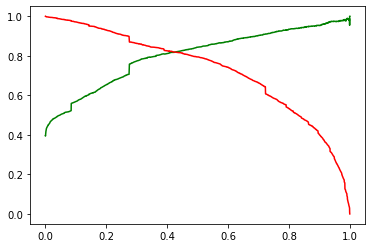

In [144]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Note** : Intersection point is approximately 0.42

### Predictions on the test set

In [145]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]])

In [146]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Specialization_Finance Management,Specialization_Human Resource and Marketing Management,Specialization_Others,Current Occupation_Unemployed,Tags_Already a student,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
4269,0,0.964504,0,0,0,0,0,0,1,0,0,0,1,1
2376,0,-0.885371,1,0,0,0,0,0,1,0,0,0,1,1
7766,0,-0.777416,0,0,0,0,0,1,0,0,0,0,1,0
9199,0,-0.885371,0,1,1,0,0,0,1,1,0,0,0,0
4359,0,-0.885371,1,0,0,0,1,0,1,0,0,0,1,0


In [147]:
# Add constant 
X_test_sm = sm.add_constant(X_test)

In [148]:
# Predicting
y_test_pred = res.predict(X_test_sm)

In [149]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred})
y_test_pred_final['ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,ID
4269,1,0.864602,4269
2376,1,0.983183,2376
7766,1,0.645892,7766
9199,0,0.000494,9199
4359,1,0.934667,4359


In [150]:
y_test_pred_final['predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.42 else 0)

In [151]:
y_test_pred_final.head()

,Converted,Converted_prob,ID,predicted
4269,1,0.864602,4269,1
2376,1,0.983183,2376,1
7766,1,0.645892,7766,1
9199,0,0.000494,9199,0
4359,1,0.934667,4359,1


In [152]:
confusion_matrix_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
confusion_matrix_test

array([[1487,  190],
       [ 200,  895]])

#### Accuracy

In [153]:
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.8593073593073594


#### Precision

In [154]:
print(precision_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.8248847926267281


#### Recall

In [155]:
print(recall_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.817351598173516


In [156]:
# Calculate F1 SCORE:

from sklearn.metrics import f1_score

print(f1_score(y_test_pred_final.Converted, y_test_pred_final.predicted, average='weighted'))

0.8591937848665858
